# 鐵達尼號資料清理

## 1. 載入相關套件

In [1]:
import seaborn as sns
import pandas as pd

C:\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## 載入鐵達尼號資料集

In [2]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 2. 資料清理、資料探索與分析

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df.describe(include='O')

,sex,embarked,who,embark_town,alive
count,891,889,891,889,891
unique,2,3,3,3,2
top,male,S,man,Southampton,no
freq,577,644,537,644,549


In [6]:
df.describe(include='all')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,889,891,891,891,203,889,891,891
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,3,3,3,2,7,3,2,2
top,NaN,NaN,male,NaN,NaN,NaN,NaN,S,Third,man,True,C,Southampton,no,True
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,644,491,537,537,59,644,549,537
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 遺失值(Missing value)處理

In [7]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 年齡(age)遺失值(Missing value)以中位數取代

In [8]:
df.age.fillna(df.age.median(), inplace=True)

In [9]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

### 上船港口(embark_town)遺失值(Missing value)以前一筆取代

In [10]:
# 取得遺失值的列數
df[pd.isna(df.embark_town)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True


In [11]:
# 以前一筆取代
df.embark_town.fillna(method='ffill', inplace=True)
df.loc[[61, 829]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,Cherbourg,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,Queenstown,yes,True


In [12]:
# 驗證
df.loc[[61-1, 829-1]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
60,0,3,male,22.0,0,0,7.2292,C,Third,man,True,NaN,Cherbourg,no,True
828,1,3,male,28.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,yes,True


### 上船港口(embarked)遺失值(Missing value)以後一筆取代

In [13]:
# 取得遺失值的列數
df[pd.isna(df.embarked)]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,Cherbourg,yes,True
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,Queenstown,yes,True


In [14]:
# 以後一筆取代
df.embarked.fillna(method='bfill', inplace=True)
df.loc[[61, 829]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
61,1,1,female,38.0,0,0,80.0,S,First,woman,False,B,Cherbourg,yes,True
829,1,1,female,62.0,0,0,80.0,C,First,woman,False,B,Queenstown,yes,True


In [15]:
# 驗證
df.loc[[61+1, 829+1]]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
62,0,1,male,45.0,1,0,83.4750,S,First,man,True,C,Southampton,no,False
830,1,3,female,15.0,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,yes,False


### 甲板(deck)遺失值過多，刪除該欄位

In [16]:
df.drop('deck', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     891 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(5)
memory usage: 79.4+ KB


## 離群值(Outlier) 處理

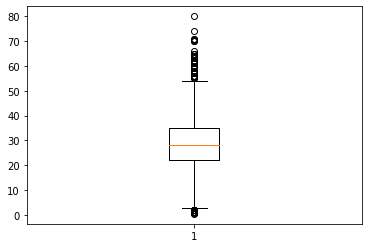

In [17]:
import matplotlib.pyplot as plt

plt.boxplot(df.age);

,label,最小值,箱子下緣,中位數,箱子上緣,最大值
0,age,3.0,22.0,28.0,35.0,54.0


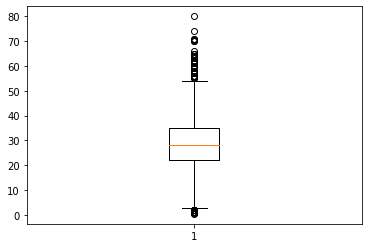

In [18]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(labels)):
        dict1 = {}
        dict1['label'] = labels[i]
        dict1['最小值'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['箱子下緣'] = bp['boxes'][i].get_ydata()[1]
        dict1['中位數'] = bp['medians'][i].get_ydata()[1]
        dict1['箱子上緣'] = bp['boxes'][i].get_ydata()[2]
        dict1['最大值'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

bp = plt.boxplot(df.age)
get_box_plot_data(['age'], bp)

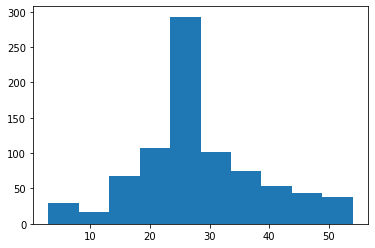

In [19]:
df = df[(3.0 <= df.age) & (df.age <= 54.0)]
plt.hist(df.age);

##  類別變數轉換為數值

In [20]:
df.sex = df.sex.map({'male':1, 'female':0})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [21]:
df.embark_town = df.embark_town.map({'Southampton':0, 'Cherbourg':1, 'Queenstown':2})
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,0,no,False
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,1,yes,False
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,0,yes,True
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,0,yes,False
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,0,no,True


## 欄位分組(bin)

In [22]:
bins = [0, 12, 18, 25, 35, 60, 100]
cats = pd.cut(df.age, bins)
cats

0      (18, 25]
1      (35, 60]
2      (25, 35]
3      (25, 35]
4      (25, 35]
         ...   
886    (25, 35]
887    (18, 25]
888    (25, 35]
889    (25, 35]
890    (25, 35]
Name: age, Length: 825, dtype: category
Categories (6, interval[int64, right]): [(0, 12] < (12, 18] < (18, 25] < (25, 35] < (35, 60] < (60, 100]]

In [34]:
cats.cat.categories

IntervalIndex([(0, 12], (12, 18], (18, 25], (25, 35], (35, 60], (60, 100]], dtype='interval[int64, right]')

In [42]:
cats.cat.categories.to_list()[1].left, cats.cat.categories.to_list()[1].right

(12, 18)

In [23]:
df.age = pd.cut(df.age, bins, labels=range(len(bins)-1))
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,2,1,0,7.2500,S,Third,man,True,0,no,False
1,1,1,0,4,1,0,71.2833,C,First,woman,False,1,yes,False
2,1,3,0,3,0,0,7.9250,S,Third,woman,False,0,yes,True
3,1,1,0,3,1,0,53.1000,S,First,woman,False,0,yes,False
4,0,3,1,3,0,0,8.0500,S,Third,man,True,0,no,True


##  移除重複資料

In [57]:
# 增加一筆重複資料
print(df.shape)

(825, 14)


In [58]:
df.drop_duplicates()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,2,1,0,7.2500,S,Third,man,True,0,no,False
1,1,1,0,4,1,0,71.2833,C,First,woman,False,1,yes,False
2,1,3,0,3,0,0,7.9250,S,Third,woman,False,0,yes,True
3,1,1,0,3,1,0,53.1000,S,First,woman,False,0,yes,False
4,0,3,1,3,0,0,8.0500,S,Third,man,True,0,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
882,0,3,0,2,0,0,10.5167,S,Third,woman,False,0,no,True
885,0,3,0,4,0,5,29.1250,Q,Third,woman,False,2,no,False
887,1,1,0,2,0,0,30.0000,S,First,woman,False,0,yes,True
888,0,3,0,3,1,2,23.4500,S,Third,woman,False,0,no,False


In [59]:
y = df.survived
X = df.drop(['survived', 'alive', 'embarked', 'who', 'alone', 'class'], axis=1)
X.head()

,pclass,sex,age,sibsp,parch,fare,adult_male,embark_town
0,3,1,2,1,0,7.2500,True,0
1,1,0,4,1,0,71.2833,False,1
2,3,0,3,0,0,7.9250,False,0
3,1,0,3,1,0,53.1000,False,0
4,3,1,3,0,0,8.0500,True,0


## 3. 不須進行特徵工程

## 4. 資料分割

In [60]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((660, 8), (165, 8), (660,), (165,))

## 特徵縮放

In [61]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 5. 選擇演算法

In [62]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

## 6. 模型訓練

In [63]:
clf.fit(X_train_std, y_train)

LogisticRegression()

## 7. 模型計分

In [64]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test_std)
# 計算準確率
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

82.42%


## 8. 模型評估，暫不進行

## 9. 模型佈署

In [65]:
# 模型存檔
import joblib

joblib.dump(clf, 'titanic_model.joblib')
joblib.dump(scaler, 'titanic_scaler.joblib');